    Distance_Feature  Speeding_Feature
0              71.24                28
1              52.53                25
2              64.54                27
3              55.69                22
4              54.58                25
5              41.91                10
6              58.64                20
7              52.02                 8
8              31.25                34
9              44.31                19
10             49.35                40
11             58.07                45
12             44.22                22
13             55.73                19
14             46.63                43
15             52.97                32


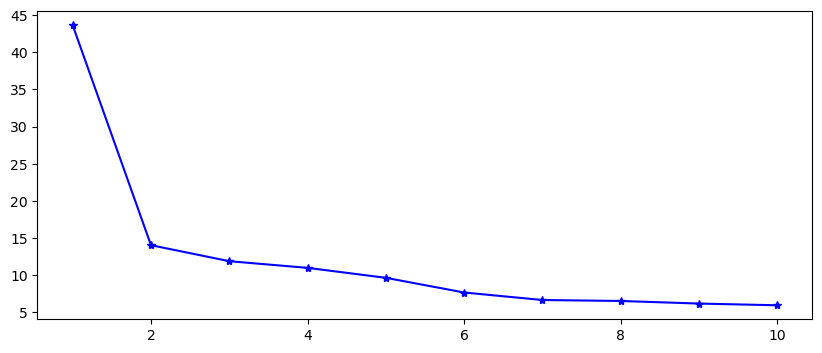

Accuracy: 0.00925
Class report:               precision    recall  f1-score   support

           0       0.01      0.74      0.01        23
           1       0.04      0.13      0.06       120
           2       0.01      0.02      0.01       177
           3       0.00      0.00      0.00       353
           4       0.00      0.00      0.00       503
           5       0.00      0.00      0.00       553
           6       0.00      0.00      0.00       524
           7       0.00      0.00      0.00       366
           8       0.00      0.00      0.00       241
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        85
          11       0.00      0.00      0.00        62
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        48
          16       0.00      0.00      0.00      

C:\Users\Apostle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Apostle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Apostle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IndexError: index 1 is out of bounds for axis 1 with size 1

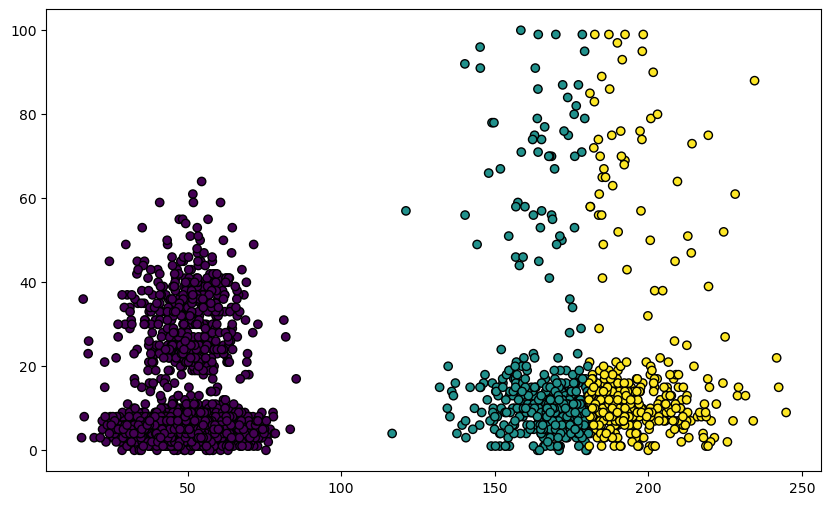

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist,pdist

df=pd.read_csv(r"C:\Users\Apostle\Downloads\driver_details.csv")
df=df.drop(columns=["Driver_ID"])
df=df.dropna()
print(df.head(16))

x=df
K=range(1,11)

KM=[KMeans(n_clusters=k).fit(x) for k in K]
centroid=[k.cluster_centers_ for k in KM]
D_k=[cdist(x,centr) for centr in centroid]
cIdx=[np.argmin(D, axis=1) for D in D_k]
dist=[np.min(D, axis=1) for D in D_k]

avgWithinSS=[sum(d)/x.shape[0] for d in dist]
wcss=[sum(d**2)/x.shape[0] for d in dist]

plt.figure(figsize=(10,4))
plt.subplot()
plt.plot(K, avgWithinSS,"b*-")
plt.show()



df=df
x=df.iloc[:,0]
x=x.values.reshape(-1,1)
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
kmeans=KMeans(n_clusters=3, random_state=11)
kmeans.fit(x)
df["Predicted speeds"]=kmeans.labels_
accuracy=accuracy_score(df["Speeding_Feature"],df["Predicted speeds"])
class_report=classification_report(df["Speeding_Feature"],df["Predicted speeds"])
conf_matrix=confusion_matrix(df["Speeding_Feature"],df["Predicted speeds"])

print(f"Accuracy: {accuracy}")
print(f"Class report: {class_report}")
print("Confusion matrix:")
print(conf_matrix)


centroids=scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10,6))
scatter=plt.scatter(df["Distance_Feature"],df["Speeding_Feature"],c=df["Predicted speeds"],cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:0],centroids[:,1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Clusters of Distance and Speed with Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()